In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


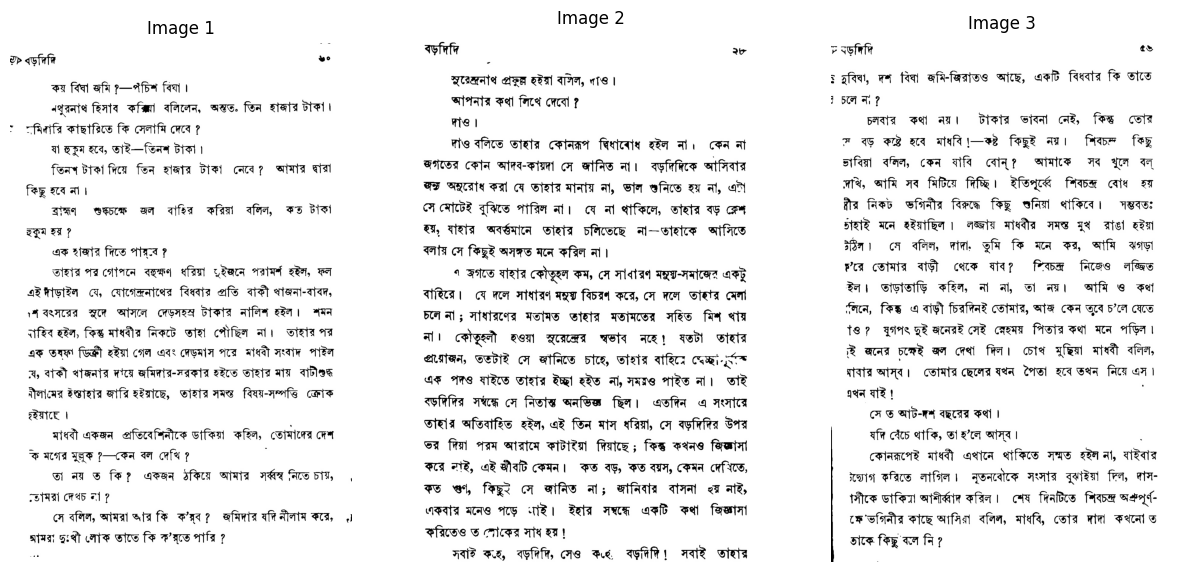

In [3]:
#dataset
import cv2
import os
def load_images_from_directory(directory_path):
    dataset_images = []
    for filename in os.listdir(directory_path):
        img_path = os.path.join(directory_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            dataset_images.append(img)
    return dataset_images


dataset_directory = "/content/drive/MyDrive/final thesis folder which contains all information/final dataset after preprocessing"


dataset_images = load_images_from_directory(dataset_directory)
def display_sample_images(images, num_samples=3):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
        plt.axis('off')
        plt.title(f"Image {i+1}")
    plt.show()

# Displaying 5 sample images from the dataset
display_sample_images(dataset_images, num_samples=3)


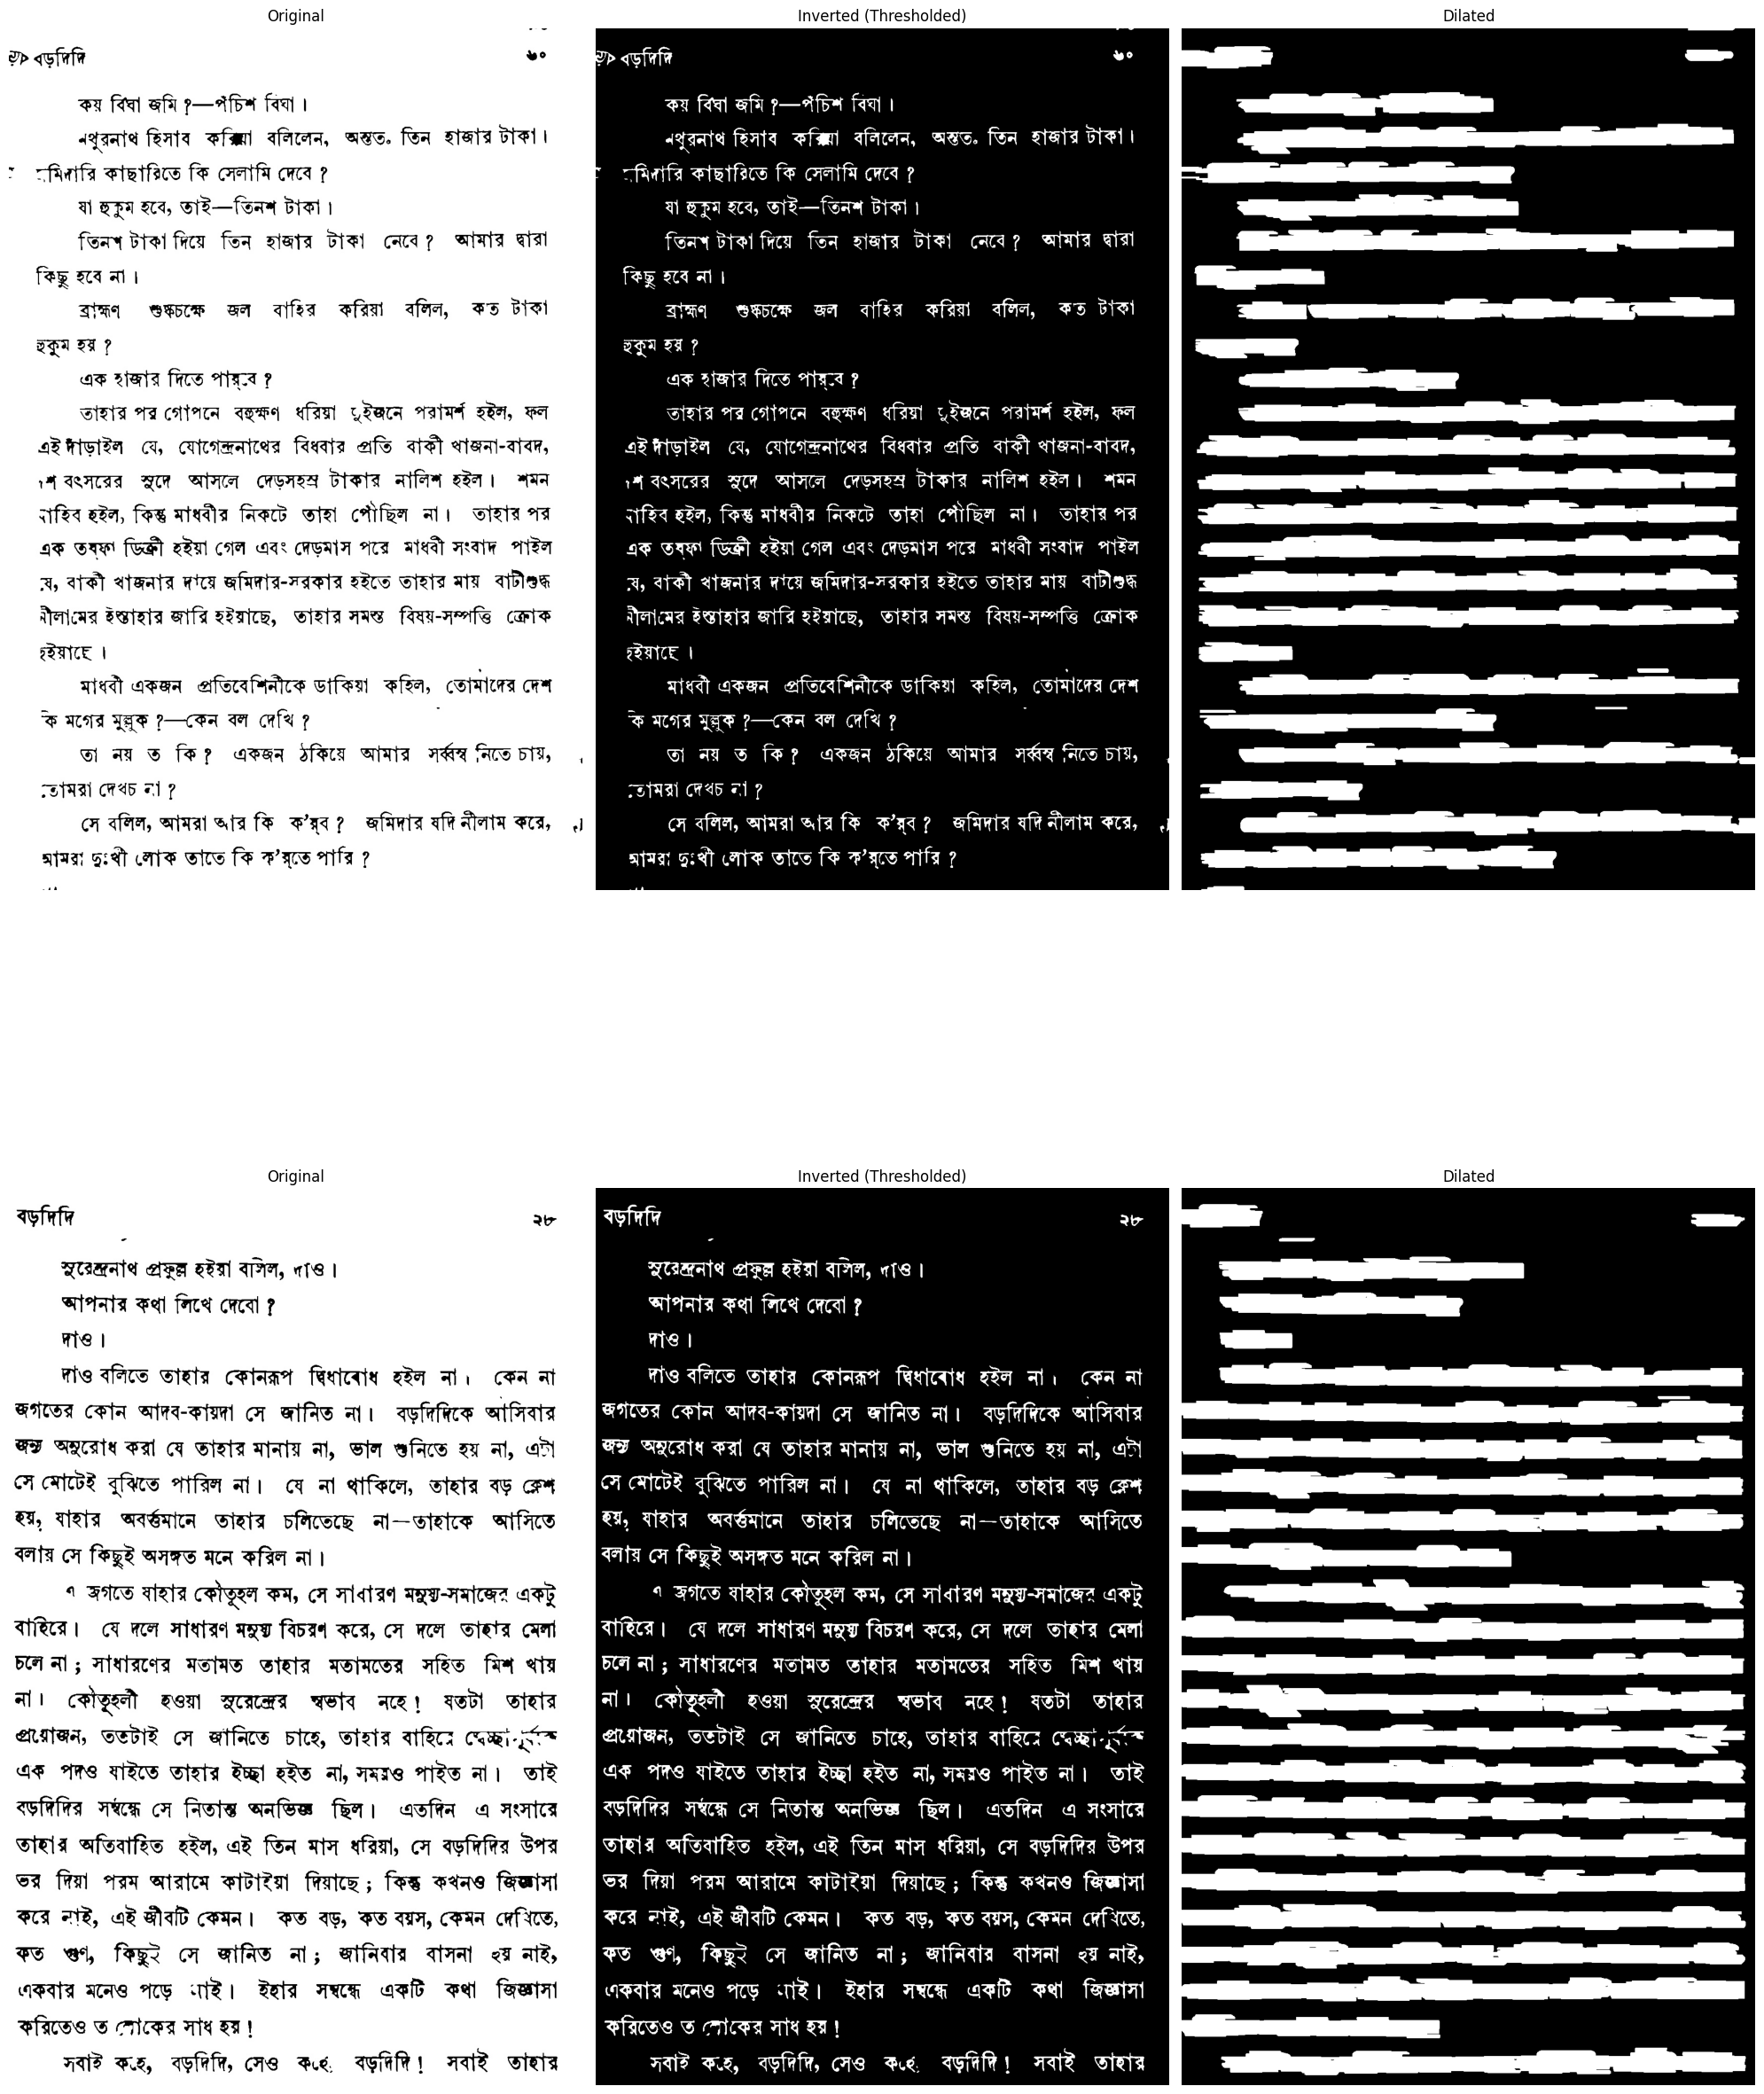

In [5]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform thresholding (inversion)
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY_INV)
    return thresh

# Function to perform dilation
def dilation(thresh_img):
    kernel = np.ones((3, 60), np.uint8)
    dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)
    return dilated_img

# Function to process and display original, thresholded, and dilated images side by side
def process_and_display_dataset(dataset_images, num_samples):
    plt.figure(figsize=(20, 30))
    for i, img in enumerate(dataset_images[:num_samples]):  # Limit to num_samples images
        # Original image
        original_img = img

        # Thresholded (inverted) image
        thresh_img = thresholding(img)

        # Dilated image
        dilated_img = dilation(thresh_img)

        # Plotting the images side by side
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
        plt.title("Original")

        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(thresh_img, cmap='gray')
        plt.axis('off')
        plt.title("Inverted (Thresholded)")

        plt.subplot(num_samples, 3, i * 3 + 3)
        plt.imshow(dilated_img, cmap='gray')
        plt.axis('off')
        plt.title("Dilated")

    plt.tight_layout()
    plt.show()

# Assuming dataset_images is already loaded, directly process and display

process_and_display_dataset(dataset_images, num_samples=2)

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_sorted_contours(image):

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    ret, thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)


    kernel = np.ones((3, 45), np.uint8)
    dilated_img = cv2.dilate(thresh, kernel, iterations=1)


    contours, _ = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    sorted_contours_lines = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

    return sorted_contours_lines

def draw_bounding_boxes(img, sorted_contours_lines):
    img_copy = img.copy()
    for ctr in sorted_contours_lines:
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (40, 100, 250), 2)
    return img_copy

def process_dataset(dataset_images):

    for img in dataset_images:

        sorted_contours_lines = extract_sorted_contours(img)


        img_with_bounding_boxes = draw_bounding_boxes(img, sorted_contours_lines)





process_dataset(dataset_images)


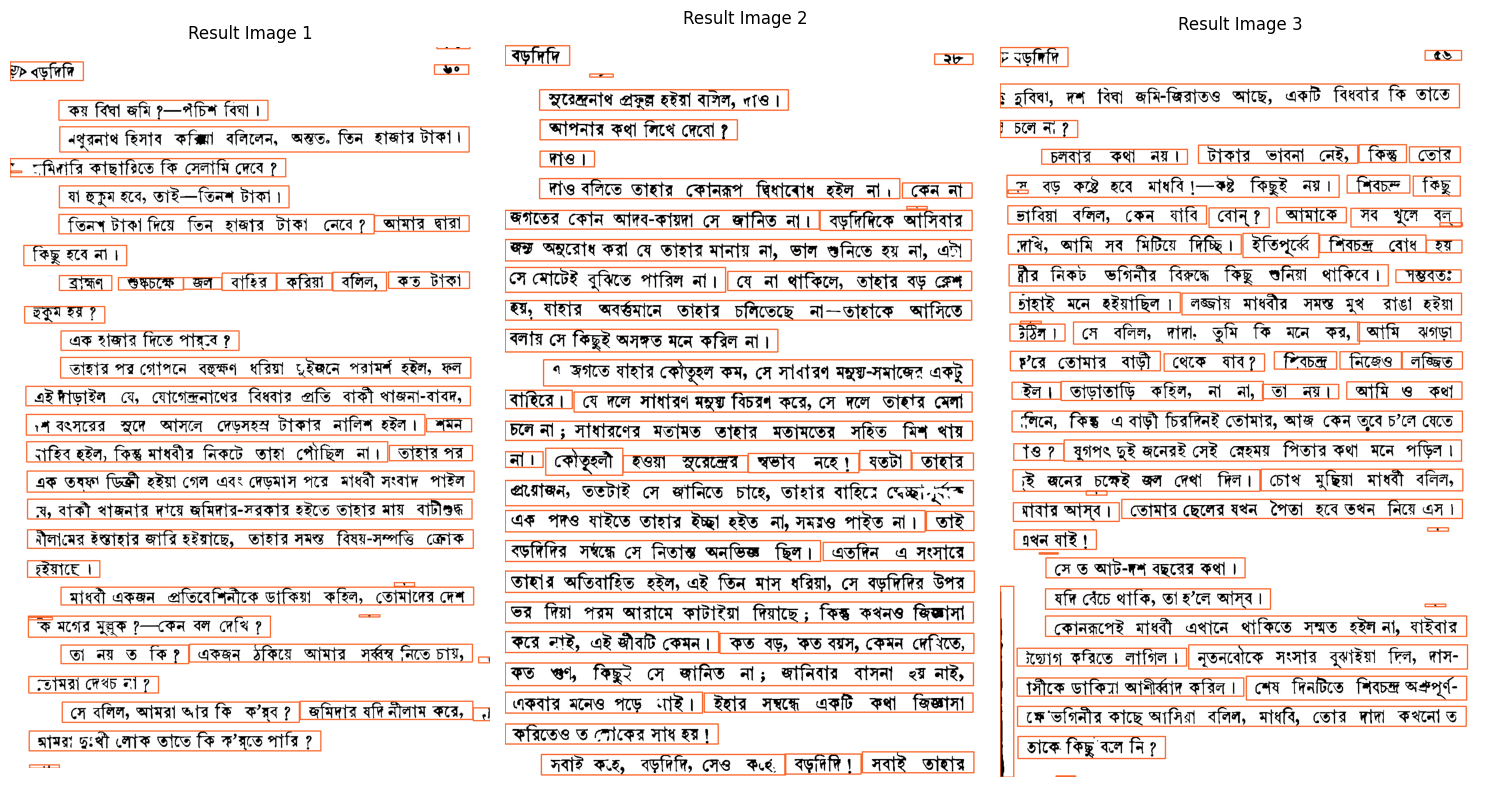

In [7]:
def process_and_display_results(dataset_images, num_samples=3):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(dataset_images[:num_samples]):  # Limit to num_samples images
        # Extract contours and draw bounding boxes
        sorted_contours_lines = extract_sorted_contours(img)
        img_with_bounding_boxes = draw_bounding_boxes(img, sorted_contours_lines)

        # Display the final result image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(img_with_bounding_boxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
        plt.title(f"Result Image {i+1}")

    plt.tight_layout()
    plt.show()

# Call the function to display results for 5 images
process_and_display_results(dataset_images)


In [6]:
# for dataset
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def dilation(thresh_img):

    kernel = np.ones((5, 14), np.uint8)


    dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)

    return dilated_img

def process_dataset_with_dilation(dataset_images):

    for img_index, img in enumerate(dataset_images):

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh_img = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY_INV)


        dilated_img = dilation(thresh_img)





process_dataset_with_dilation(dataset_images)


In [9]:
from google.colab.patches import cv2_imshow

In [8]:
# forr dataset
import cv2
import numpy as np

def extract_sorted_contours(image):

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((5, 13), np.uint8)
    dilated_img = cv2.dilate(thresh, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_words = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

    return sorted_contours_words

def draw_bounding_boxes(img, img_gray, sorted_contours_words):
    img_copy = img.copy()
    words_list = []

    for word in sorted_contours_words:

        x, y, w, h = cv2.boundingRect(word)


        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (40, 100, 250), 2)


        words_list.append([x, y, x + w, y + h])

    return img_copy

def process_dataset_with_words(dataset_images):

    for img_index, img in enumerate(dataset_images):

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


        sorted_contours_words = extract_sorted_contours(img)


        img_with_words_boxes = draw_bounding_boxes(img, img_gray, sorted_contours_words)



        cv2.waitKey(0)
        cv2.destroyAllWindows()

process_dataset_with_words(dataset_images)


Drawing Boundary Box around each word

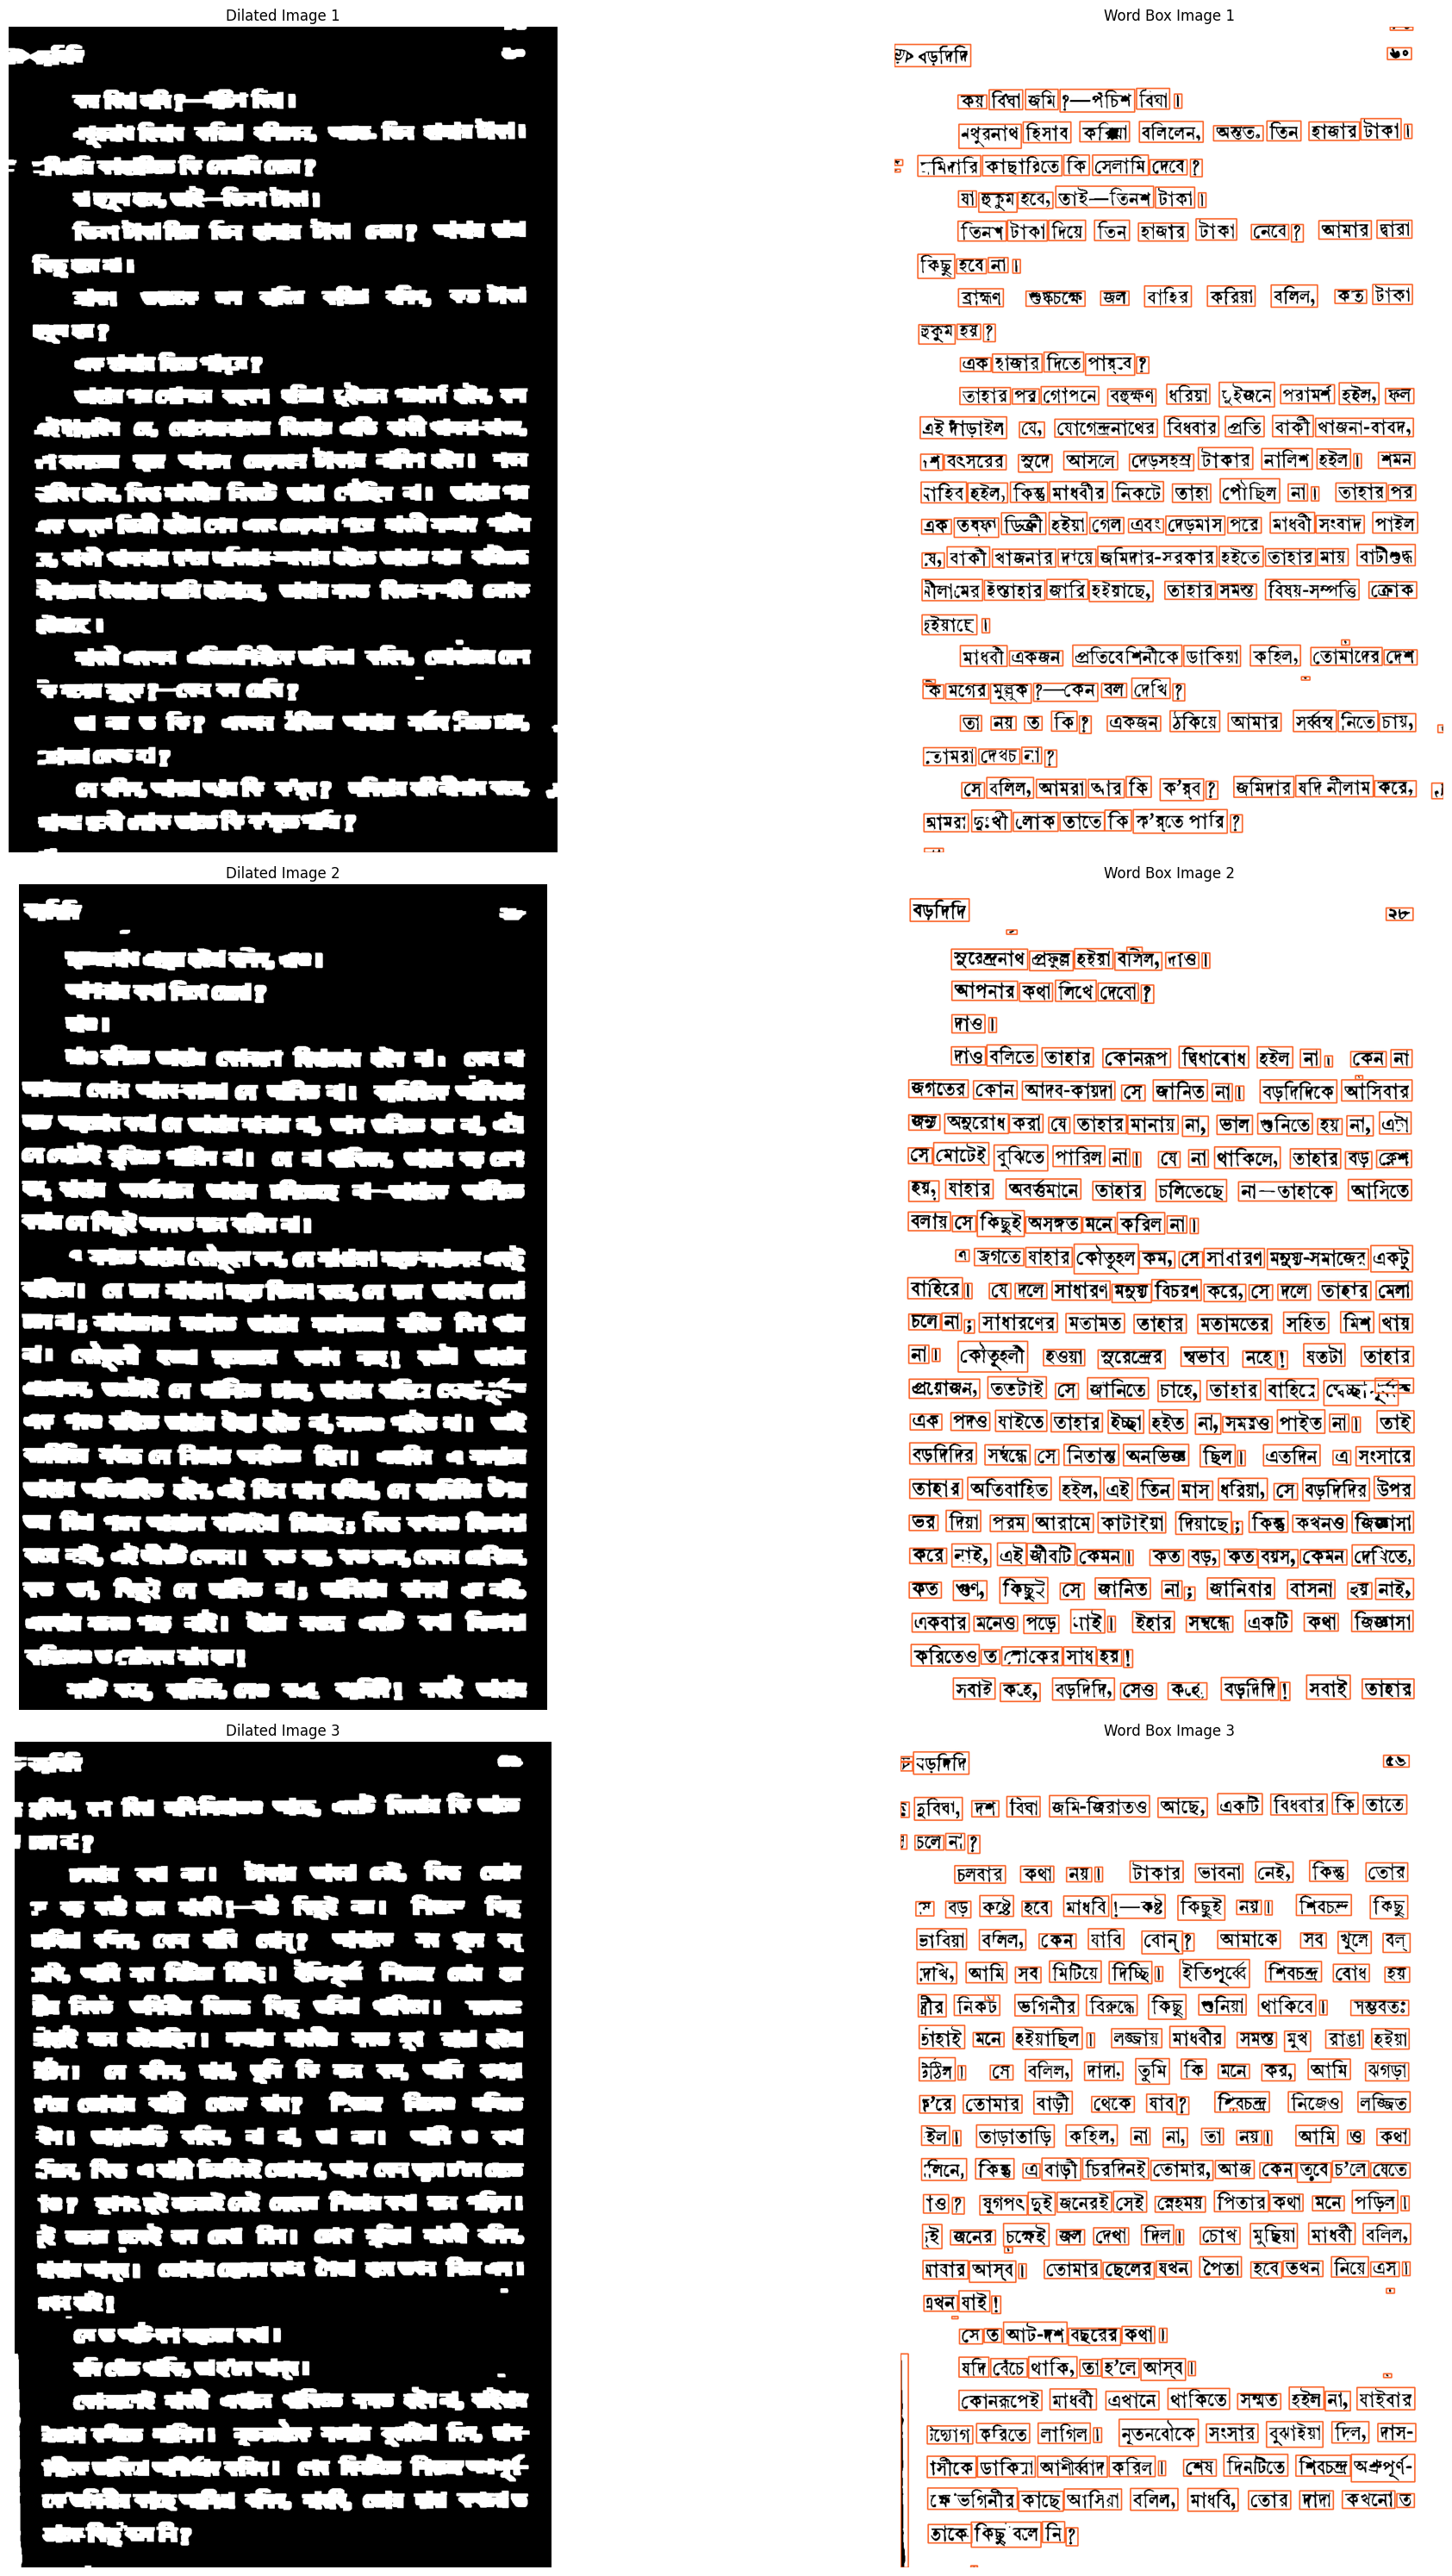

In [9]:
import matplotlib.pyplot as plt

def process_and_display_with_words(dataset_images, num_samples=5):
    plt.figure(figsize=(25, 30))
    for i, img in enumerate(dataset_images[:num_samples]):  
        # Convert to grayscale and extract dilated image and sorted contours
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5, 13), np.uint8)
        dilated_img = cv2.dilate(thresh, kernel, iterations=1)
        contours, _ = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        sorted_contours_words = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

        # Draw bounding boxes
        img_with_words_boxes = img.copy()
        for word in sorted_contours_words:
            x, y, w, h = cv2.boundingRect(word)
            cv2.rectangle(img_with_words_boxes, (x, y), (x + w, y + h), (40, 100, 250), 2)

        # Display the dilated image
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(dilated_img, cmap='gray')
        plt.axis('off')
        plt.title(f"Dilated Image {i+1}")

        # Display the word box image
        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(cv2.cvtColor(img_with_words_boxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
        plt.title(f"Word Box Image {i+1}")

    plt.tight_layout()
    plt.show()

# Assuming dataset_images is already loaded
process_and_display_with_words(dataset_images, num_samples=3)


In [10]:
import cv2
import numpy as np
import os

def extract_sorted_contours(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)

    # Create a kernel for dilation
    kernel = np.ones((5, 14), np.uint8)
    dilated_img = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Sort contours by their y-coordinate
    sorted_contours_words = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

    return sorted_contours_words

def save_segmented_words(output_dir, dataset_images):
    # Create a directory to save the segmented words
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over each image in the dataset
    for img_index, img in enumerate(dataset_images):
        # Extract and sort contours for the current image
        sorted_contours_words = extract_sorted_contours(img)

        # Iterate over the sorted contours and save each word as an image
        for i, ctr in enumerate(sorted_contours_words):
            try:
                x, y, w, h = cv2.boundingRect(ctr)
                word_img = img[y:y+h, x:x+w]
                cv2.imwrite(os.path.join(output_dir, f'word_{img_index}_{i}.jpg'), word_img)
            except Exception:
                pass  # Skip any errors without printing

# Define output directory path
output_dir = '/content/drive/MyDrive/final thesis folder which contains all information/words'

# Save segmented words from the dataset into the output directory
save_segmented_words(output_dir, dataset_images)


Showing some samples of extracted words

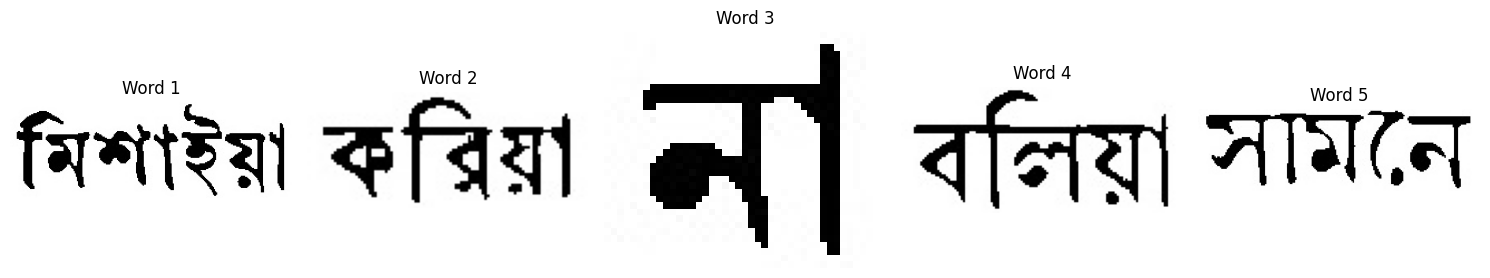

In [17]:
import cv2
import os
import matplotlib.pyplot as plt
import random

def show_sample_words(output_dir, num_words=5):
    # List all the saved word images
    word_images = [f for f in os.listdir(output_dir) if f.endswith('.jpg')]

    # Shuffle the word images list to display different words each time
    random.shuffle(word_images)

    # Display the first few word images after shuffling
    plt.figure(figsize=(15, 10))
    for i in range(min(num_words, len(word_images))):
        word_img_path = os.path.join(output_dir, word_images[i])
        word_img = cv2.imread(word_img_path)
        word_img_rgb = cv2.cvtColor(word_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
        plt.subplot(1, num_words, i + 1)
        plt.imshow(word_img_rgb)
        plt.axis('off')
        plt.title(f"Word {i+1}")

    plt.tight_layout()
    plt.show()

# Define output directory path
output_dir = '/content/drive/MyDrive/final thesis folder which contains all information/words'

# Show some sample segmented words
show_sample_words(output_dir, num_words=5)  # Change num_words to show more or fewer words


In [ ]:
# character segment for dataset

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def extract_sorted_contours(image):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)

    # Perform dilation
    kernel = np.ones((5, 14), np.uint8)
    dilated_img = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Sort contours by their y-coordinate
    sorted_contours_words = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

    return sorted_contours_words

def visualize_contours(image, contours):
    # Draw contours on the image
    img_contours = image.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)
    cv2_imshow(img_contours)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def extract_characters_from_dataset(dataset_images, output_dir):
    # Create the output directory
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over each image in the dataset
    for img_index, img in enumerate(dataset_images):
        print("Processing image:", img_index + 1)

        # Extract and sort contours for the current image
        sorted_contours_words = extract_sorted_contours(img)
        print("Number of words detected:", len(sorted_contours_words))

        # Visualize contours for debugging
        visualize_contours(img, sorted_contours_words)

        # Iterate over each word in `sorted_contours_words`
        for i, word_contour in enumerate(sorted_contours_words):
            try:
                x, y, w, h = cv2.boundingRect(word_contour)
                word_roi = img[y:y+h, x:x+w]

                # Convert the word ROI to grayscale
                word_gray = cv2.cvtColor(word_roi, cv2.COLOR_BGR2GRAY)

                # Apply adaptive thresholding to binarize the word image
                binary_word = cv2.adaptiveThreshold(word_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

                # Find contours in the binary word image
                contours, _ = cv2.findContours(binary_word, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # Iterate through each contour (character) in the word
                for j, contour in enumerate(contours):
                    # Get the bounding box coordinates of the character
                    x_char, y_char, w_char, h_char = cv2.boundingRect(contour)

                    # Skip contours that are too small or too large to be characters
                    if w_char < 5 or h_char < 5 or w_char > 0.9 * word_roi.shape[1] or h_char > 0.9 * word_roi.shape[0]:
                        continue

                    # Extract the character ROI from the word ROI
                    char_roi = word_roi[y_char:y_char+h_char, x_char:x_char+w_char]

                    # Save the character as an image file
                    char_filename = os.path.join(output_dir, f"image_{img_index}_word_{i}_char_{j}.png")
                    cv2.imwrite(char_filename, char_roi)

                    # Optionally, you can also display the segmented characters
                    plt.imshow(char_roi, cmap='gray')
                    plt.title(f"Segmented Character {j} in Word {i} of Image {img_index}")
                    plt.show()
            except Exception as e:
                print(f"Error processing word {i} in image {img_index}: {e}")

    print("Segmented characters saved in folder:", output_dir)


output_directory = '/content/drive/MyDrive/dataset sample/characters'

extract_characters_from_dataset(dataset_images, output_directory)


In [ ]:
from google.colab.patches import cv2_imshow